# 합성곱 신경망을 사용한 이미지 분류

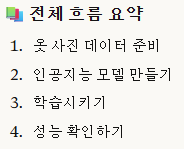

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 데이터 불러오기
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 정규화 (0~255 → 0~1)
train_scaled = train_input / 255.0

# 형태 변경 (CNN용)
train_scaled = train_scaled.reshape(-1, 28, 28, 1)

# 훈련/검증 데이터 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

데이터 처리 과정

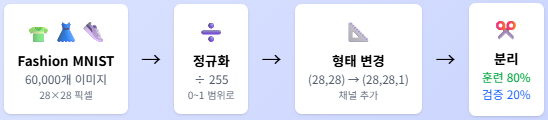

## 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

# 첫 번째 합성곱 블록
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                               padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

# 두 번째 합성곱 블록
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                               padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 분류 레이어
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

c:\Users\User\.conda\envs\DL\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN 구조 시각화

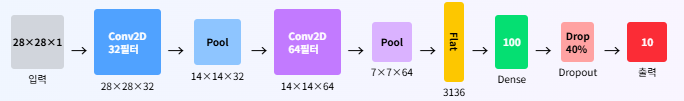

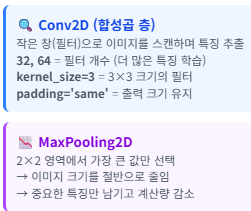
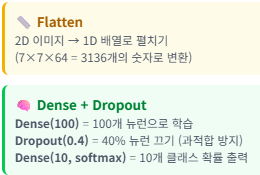

쉬운 비유 : 탐정이 옷을 분류하는 과정

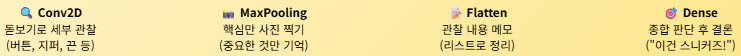

### 모델 구조 확인

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

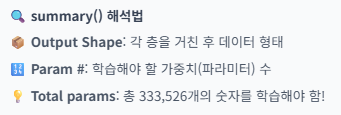

In [5]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [6]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## 모델 컴파일과 훈련

In [7]:
# 모델 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

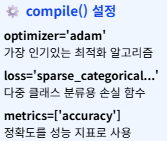

In [8]:
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                  save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                    restore_best_weights=True)

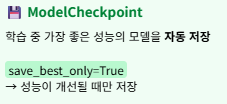
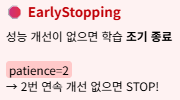

쉬운 비유 : 시험공부하는 학생 

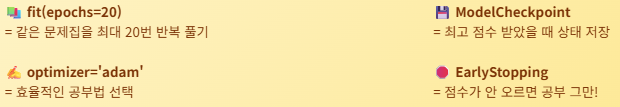

In [9]:
# 학습 시작!
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8108 - loss: 0.5295 - val_accuracy: 0.8742 - val_loss: 0.3386
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8736 - loss: 0.3493 - val_accuracy: 0.8957 - val_loss: 0.2825
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8911 - loss: 0.3006 - val_accuracy: 0.8984 - val_loss: 0.2692
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9019 - loss: 0.2680 - val_accuracy: 0.9148 - val_loss: 0.2380
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9108 - loss: 0.2472 - val_accuracy: 0.9158 - val_loss: 0.2331
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9184 - loss: 0.2221 - val_accuracy: 0.9171 - val_loss: 0.2301
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9217 - loss: 0.2089 - val_accuracy: 0.9160 - val_loss: 0.2418
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9285 - loss: 0

### 학습결과 시각화

In [10]:
import matplotlib.pyplot as plt

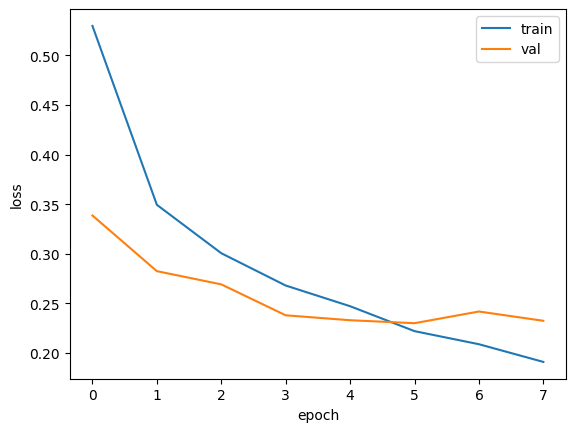

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 그래프 읽는법

loss가 내려가면 -> 학습 잘 되고 있음

train loss -> ? 데이터 손실

val loss -> 검증 데이터 손실

### 주의할 점

val_loss만 올라가면 -> 과적합

두 선이 벌어지면 -> 모델 외우기만 함

이상적 : 두 선이 함께 내려감

## 저장된 모델 불러오기 & 평가

In [12]:
model = keras.models.load_model('best-cnn-model.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9171 - loss: 0.2301


[0.23007771372795105, 0.9170833230018616]

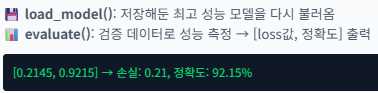

## 실제 예측하기

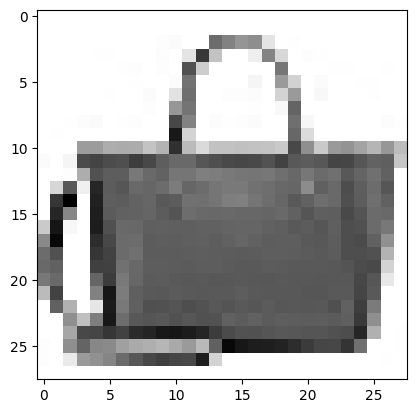

In [13]:
# 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
# 예측 확률
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[7.6695618e-20 5.5265191e-27 5.3051788e-20 2.9912420e-21 6.2025983e-19
  1.1321179e-19 7.8176394e-20 4.4700701e-19 1.0000000e+00 3.3999866e-20]]


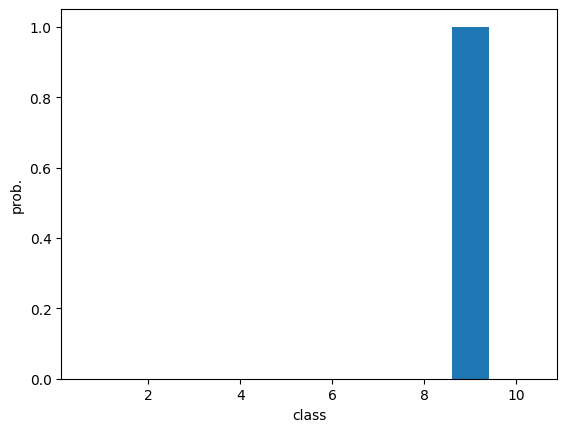

In [15]:
# 시각화
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
# 최종 예측 결과
import numpy as np
print(classes[np.argmax(preds)])

가방


예측 과정 정리

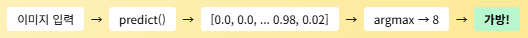

## 최종 테스트

모델이 한 번도 보지 못한 테스트 데이터(10,000개)로 진짜 실력 확인!

In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9078 - loss: 0.2564


[0.25635454058647156, 0.907800018787384]

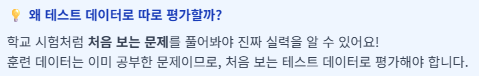

## 전체 요약

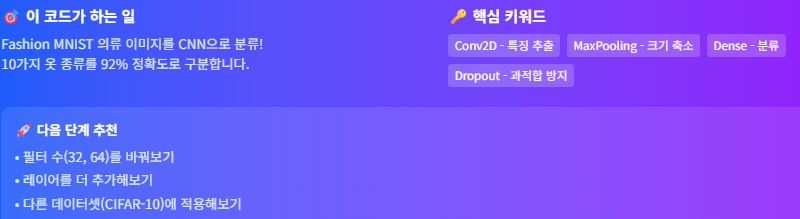